<h1 align='center'>Euclidean Distance: <br>
A Recommendation Engine Using Nearest Neighbors</h1>

<h2>Prerequisites</h2>
<ul>
    <li>You have seen the standard/Euclidean <a href="https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm" target="_blank">norm</a> of a vector</li>
    <li>You have some awareness of the ubiquity of making recommendations online.  For reference, briefly skim <a href="https://en.wikipedia.org/wiki/Recommender_system" target="_blank">this wiki</a>, <a href="https://www.thrillist.com/entertainment/nation/the-netflix-prize#" target="_blank"> this article</a> about Netflix from more than a decade ago, and <a href="https://www.nytimes.com/2017/04/17/arts/youtube-broadcasters-algorithm-ads.html" target="_blank"> this article</a> about YouTube indicating how this is still a difficult task. </li>
    <li>It would be helpful if you have read the article, Higher Dimensions and Linear Regression, as we will be using a 20-dim space below
</ul>

<h2>Introduction</h2>
Suppose we started an online streaming service last week.  Hetplix and Fulu probably aren't good choices for names, so for homework, go find a marketing major.  In the course of our huge explosion in popularity since opening, we have collected the reviews of 500 users for all of the Pixar films released to date.  Also, suppose we have a new user John who has seen all of the Pixar films except Cars 2, and has given us ratings for them.  We would like to develop a method to predict John's expected review of the movie he hasn't seen, as to help him decide if it is worth his time or if he should watch one of our other billion movies.

There are certainly a few ways we could go about doing this:
<ul>
    <li>We could take the average of all of his Pixar ratings and decide that, in general, if he likes most Pixar movies, he will probably like one more</li>
    <li>We could pull the ratings from IMDB and Rotten Tomatoes, list them on our site, and let John decide for himself</li>
    <li>We could take the average of all of our users' ratings for Cars 2, and assume that, since John is using our service, he probably isn't all that different</li>
    <li>We could narrow our selection of users from our userbase to those who have similar taste to John on the other Pixar films, and use their ratings of Cars 2</li>
</ul>
We will focus our attention on this last one.  If we can find users who have similar taste to John, then we are likely to be able to provide some insight into John's future opinions.  There actually many ways to do this, and plenty of ongoing research on how to do it well, but we will focus on the method of nearest neighbors, which can leverage Euclidean distance to find the users closest to John.

Note to self: if we can solve this recommendation engine problem, then we can spend our energy on chasing the real money and open a gym

<h2>Review of Euclidean Distance</h2>
Before we dive into the details, let's briefly review Euclidean distance, which is the most common way to define the distance between two points.  In part, this is because the Euclidean norm of a vector is defined using nothing more than the Pythagorean theorem.  

Let $\mathbf{v} = [2,3]$ be a vector in a 2-dim space, as shown:


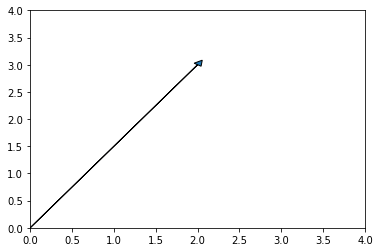

In [47]:
import matplotlib.pyplot as plt 
ax = plt.axes()
ax.set_ylim(ymin=0, ymax=4) 
ax.set_xlim(xmin=0, xmax=4) 
ax.arrow(0, 0, 2, 3, head_width=0.1, head_length=0.1)
plt.show()



By applying the Pythagorean theorem, we get that the length of this vector is 
$$ \\ ||\mathbf{v}|| = \sqrt{2^2 + 3^2} = \sqrt{13} \\ $$
In general, the length of any 2-dim vector, $\mathbf{v} = [v_1,v_2]$, is given by 
$$ \\ ||\mathbf{v}|| = \sqrt{v_1^2 + v_2^2} \\ $$
To be clear, this is measuring the distance of the end of the vector from the origin (i.e., the zero vector).  And, in order to do so, it measures the amount of change in the $v_1$ dimension and the amount of change in the $v_2$ dimension.  It would perhaps be helpful to write this explicitly as
$$||\mathbf{v}|| = \sqrt{(v_1-0)^2 + (v_2-0)^2} \\ $$ Even if this is a little cumbersome, it does have the advantage of hinting at how we would like to define the distance between any two vectors, not just with the zero vector.

Let $\mathbf{v} = [3,3]$ and $\mathbf{u} = [2,3]$ be 2-dim vectors, as shown:

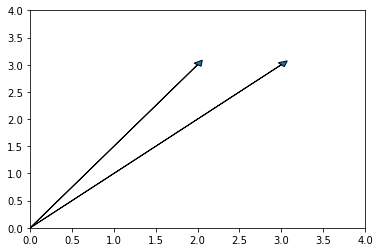

In [48]:
ax = plt.axes()
ax.set_ylim(ymin=0, ymax=4) 
ax.set_xlim(xmin=0, xmax=4) 
ax.arrow(0, 0, 2, 3, head_width=0.1, head_length=0.1)
ax.arrow(0, 0, 3, 3, head_width=0.1, head_length=0.1)
plt.show()

Then we can see that to move between $\mathbf{v}$ and $\mathbf{u}$ we simply need to move 1 unit to the right and we don't need to adjust our vertical direction at all, i.e., the distance between them is 1.

Taking hints from above, we would write the distance between these two vectors as
$$||\mathbf{v} - \mathbf{u}|| = \sqrt{(3-2)^2 + (3-3)^2} = 1 \\ $$

In general, the distance between any two 2-dim vectors, $\mathbf{v}=[v_1,v_2]$ and $\mathbf{u}=[u_1,u_2]$ is given by
$$||\mathbf{v} - \mathbf{u}|| = \sqrt{(v_1-u_1)^2 + (v_2-u_2)^2} \\ $$
That is, we simply take the difference in each dimension and then apply the familiar computations of the Pythagorean formula.

This very strongly hints at what should occur in the 3-dim case.  That is, let $\mathbf{v}=[v_1,v_2, v_3]$ and $\mathbf{u}=[u_1,u_2,u_3]$ be two 3-dim vectors.  Then to find the distance between them, we apply the same procedure in each dimension
$$||\mathbf{v} - \mathbf{u}|| = \sqrt{(v_1-u_1)^2 + (v_2-u_2)^2 + (v_3-u_3)^2} \\ $$

And, as we have seen in other applications, the real power of vectors is that it is straightforward to take the ideas we develop using our visual intuition in lower dimensions and extend them to arbitrary finite dimensions.  Let $\mathbf{v}=[v_1,v_2,\ldots,v_n]$ and $\mathbf{u}=[u_1,u_2,\ldots,u_n]$ be two n-dim vectors, with n a natural number.  Then the Euclidean distance between them is given by
$$||\mathbf{v} - \mathbf{u}|| = \sqrt{(v_1-u_1)^2 + (v_2-u_2)^2 + \ldots + (v_n-u_n)^2} \\ $$

<h2>Our Data</h2>
At this point, Pixar has released 20 movies:
<ol>
    <li> Toy Story, 1995</li>
    <li> A Bug's Life, 1998</li>
    <li> Toy Story 2, 1999</li>
    <li> Monsters, Inc., 2001</li>
    <li> Finding Nemo, 2003</li>
    <li> The Incredibles, 2004</li>
    <li> Cars, 2006</li>
    <li> Ratatouille, 2007</li>
    <li> WALL-E, 2008</li>
    <li> Up, 2009</li>
    <li> Toy Story 3, 2010</li>
    <li> Cars 2, 2011</li>
    <li> Brave, 2012</li>
    <li> Monsters University, 2013</li>
    <li> Inside Out, 2015</li>
    <li> The Good Dinosaur, 2015</li>
    <li> Finding Dory, 2016</li>
    <li> Cars 3, 2017</li>
    <li> Coco, 2017</li>
    <li> Incredibles 2, 2018</li>
</ol>
As mentioned, we have collected 500 user ratings for all 20 of these movies.  Our database looks like the following, where each column is movie and each row is a users rating:

In [51]:
user_ratings.head()

,A Bugs Life,Brave,Cars,Cars 2,Cars 3,Coco,Finding Dory,Finding Nemo,Incredibles 2,Inside Out,Monsters University,"Monsters, Inc.",Ratatouille,The Good Dinosaur,The Incredibles,Toy Story,Toy Story 2,Toy Story 3,Up,WALL-E
0,6.9,7.8,8.4,6.9,6.6,9.2,5.3,9.7,9.5,8.0,8.0,6.6,8.2,9.4,8.1,9.1,9.4,8.2,8.0,9.0
1,8.5,7.5,7.8,6.0,5.4,8.8,7.6,9.1,8.1,9.7,5.0,7.7,8.5,6.9,7.8,8.9,6.0,9.6,8.5,8.3
2,7.5,7.8,7.5,6.3,6.7,7.0,8.8,5.8,7.2,9.4,8.6,6.6,7.1,6.1,7.1,7.0,8.6,7.7,8.4,9.6
3,8.1,8.6,6.1,6.7,6.4,9.6,9.0,8.9,7.2,7.5,6.3,8.4,7.7,8.1,7.6,5.5,7.1,9.3,7.6,7.9
4,7.1,9.2,7.3,6.7,6.2,9.4,9.5,8.0,9.3,7.5,6.8,9.5,8.4,7.3,9.2,7.8,7.5,7.6,9.6,8.8


There are 500 rows, so we have listed only the first 5 users here, to save space.

In linear algebra terms, each movie is a dimension where the magnitude of ranking indicates the distance from the origin in that dimension, and we could represent a user's ratings using a 20-dim vector.  For example, user 0 has the vector
$$[6.9, 7.8, 8.4, 6.9, 6.6, 9.2, 5.3, 9.7, 9.5, 8.0, 8.0, 6.6, 8.2, 9.4, 8.1, 9.1, 9.4, 8.2, 8.0, 9.0]$$

Similarly, we can list John's ratings using this compact notation, including Null for Cars 2:
$$[9,8,5,Null,5,8,7,8,9,10,7,8,9,8,7,8,9,7,7,9]$$

For a moment, let's restrict our perspective to only 2 dimensions.  Doing so we could plot all of the combinations of points consisting of a user's rating of Cars 2 against one of the other movies.

For the first eight movies, with Cars 2 on the vertical axis, this would look like:

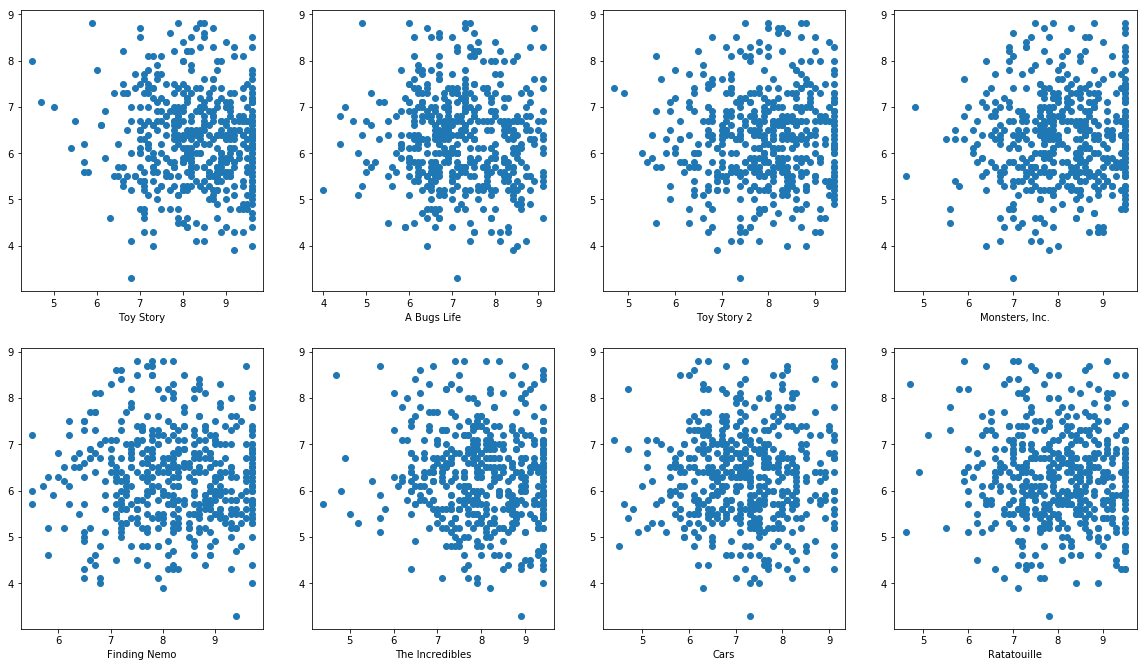

In [62]:
fig = plt.figure(figsize=(20, 30))

ax1 = fig.add_subplot(5,4,1)    
ax2 = fig.add_subplot(5,4,2)   
ax3 = fig.add_subplot(5,4,3)
ax4 = fig.add_subplot(5,4,4)
ax5 = fig.add_subplot(5,4,5)
ax6 = fig.add_subplot(5,4,6)
ax7 = fig.add_subplot(5,4,7)
ax8 = fig.add_subplot(5,4,8)

ax1.scatter(user_ratings['Toy Story'], user_ratings['Cars 2'])
ax2.scatter(user_ratings['A Bugs Life'], user_ratings['Cars 2'])
ax3.scatter(user_ratings['Toy Story 2'], user_ratings['Cars 2'])
ax4.scatter(user_ratings['Monsters, Inc.'], user_ratings['Cars 2'])
ax5.scatter(user_ratings['Finding Nemo'], user_ratings['Cars 2'])
ax6.scatter(user_ratings['The Incredibles'], user_ratings['Cars 2'])
ax7.scatter(user_ratings['Cars'], user_ratings['Cars 2'])
ax8.scatter(user_ratings['Ratatouille'], user_ratings['Cars 2'])

ax1.set_xlabel('Toy Story')
ax2.set_xlabel('A Bugs Life')
ax3.set_xlabel('Toy Story 2')
ax4.set_xlabel('Monsters, Inc.')
ax5.set_xlabel('Finding Nemo')
ax6.set_xlabel('The Incredibles')
ax7.set_xlabel('Cars')
ax8.set_xlabel('Ratatouille')

plt.show()

But, besides being a jumbled mess to look at, there is no clear indication which movie would best predict a ranking for the value of Cars 2.  That is, even though it is easy to see who is close together in two dimensions, we would like to avoid having to choose only one movie and would rather include all of the movies so that we have a better representation of "taste."

Fortunately we have already extended the definition of Euclidean distance to arbitrary finite dimension, so it is an easy application to include all 20 movies, i.e., all 20 dimensions.

<h2>Finding A Recommendation for Cars 2</h2>
To start finding the users closest to John, let's first ensure we understand how distance is measured over all 20 dimension.  Let's take user 0 and John, and let's omit the vector element for Cars 2.  This gives us two 19-dim vectors, $\mathbf{u}$ and $\mathbf{j}$ for the user and John, respectively:
$$\mathbf{u} =[6.9, 7.8, 8.4, 6.6, 9.2, 5.3, 9.7, 9.5, 8.0, 8.0, 6.6, 8.2, 9.4, 8.1, 9.1, 9.4, 8.2, 8.0, 9.0] \\ $$
$$\mathbf{j} =[9,8,5,5,8,7,8,9,10,7,8,9,8,7,8,9,7,7,9]  \\ $$
Then, the distance between them is given by:
$$||\mathbf{u} - \mathbf{j}|| = \sqrt{(6.9-9)^2 + (7.8-8)^2 +(8.4-5)^2+(6.6-5)^2+(9.2-8)^2+(5.3-7)^2+(9.7-8)^2+(9.5-9)^2+(8.0-10)^2+(8.0-7)^2+(6.6-8)^2+(8.2-9)^2+(9.4-8)^2+(8.1-7)^2+(9.1-8)^2+(9.4-9)^2+(8.2-7)^2+(8.0-7)^2+(9.0-9)^2 } \\ $$
,which evaluates to 6.37.  

We are certainly only going to type that out for one example.  But, let's calculate the distance of each individual user from John and add this as a column in our database.

In [68]:
john_ratings = [9,8,5,5,8,7,8,9,10,7,8,9,8,7,8,9,7,7,9]
distance_calc =(user_ratings[['A Bugs Life','Brave','Cars','Cars 3','Coco','Finding Dory','Finding Nemo',
                                         'Incredibles 2','Inside Out','Monsters University','Monsters, Inc.','Ratatouille','The Good Dinosaur','The Incredibles','Toy Story',
                                         'Toy Story 2','Toy Story 3','Up','WALL-E']] - np.array(john_ratings)).pow(2).sum(1).pow(0.5)

user_ratings.insert(loc=0, column='distance', value=distance_calc)

In [69]:
user_ratings.head()

,distance,A Bugs Life,Brave,Cars,Cars 2,Cars 3,Coco,Finding Dory,Finding Nemo,Incredibles 2,...,Monsters University,"Monsters, Inc.",Ratatouille,The Good Dinosaur,The Incredibles,Toy Story,Toy Story 2,Toy Story 3,Up,WALL-E
0,6.373382,6.9,7.8,8.4,6.9,6.6,9.2,5.3,9.7,9.5,...,8.0,6.6,8.2,9.4,8.1,9.1,9.4,8.2,8.0,9.0
1,6.091798,8.5,7.5,7.8,6.0,5.4,8.8,7.6,9.1,8.1,...,5.0,7.7,8.5,6.9,7.8,8.9,6.0,9.6,8.5,8.3
2,6.311101,7.5,7.8,7.5,6.3,6.7,7.0,8.8,5.8,7.2,...,8.6,6.6,7.1,6.1,7.1,7.0,8.6,7.7,8.4,9.6
3,6.374167,8.1,8.6,6.1,6.7,6.4,9.6,9.0,8.9,7.2,...,6.3,8.4,7.7,8.1,7.6,5.5,7.1,9.3,7.6,7.9
4,6.615134,7.1,9.2,7.3,6.7,6.2,9.4,9.5,8.0,9.3,...,6.8,9.5,8.4,7.3,9.2,7.8,7.5,7.6,9.6,8.8


Let's also look at some of the statistics on the column:    

In [72]:
user_ratings['distance'].describe()

count    500.000000
mean       6.457219
std        0.852428
min        3.963584
25%        5.873031
50%        6.423395
75%        6.978538
max        9.342377
Name: distance, dtype: float64

And, we can see that the closest user and the farthest user have a distance of 3.96 units and 9.34 units from John, respectively.  So, we were indeed able to find some users with taste more similar to John than the entire user base.

All we need to do now is collest the closest, say, 10 users and generate a score.

In [75]:
nearest_neighbors = user_ratings.nsmallest(10, 'distance')
nearest_neighbors["Cars 2"].mean()

6.530000000000001

Indicating that John is likely to enjoy Cars 2 a little more than the average user (IMDB has an average rating of 6.3 for Cars 2).

<h2>Closing Thoughts</h2>
I think it's ok to acknowledge a few short-comings with the above analysis, as the goal here is really only to whet your appetite for further exploration and to breathe a little life into the, perhaps seemingly arbitrary, computations we do in class.  Our result came out to be pretty close to the average user rating.  In part, this is because of how I generated our user data (please see the appendix if you would like to read more).  But, without being glib, this is also partly how statistics operates.  Once we collected the nearest neighbors, I simply took the mean of their ratings.  Perhaps if I took a weighted mean based on proximity, I could have improved this result slightly.  But, ultimately, it is very unlikely that John is going to differ significantly from most of the population anyways.  So, it becomes a task unto itself to decide how far away from the mean is significant enough to be considered a positive result.  Furthermore, Euclidean distance naturally assumes that we are in Euclidean space.  Without a good deal more work, it is not obvious to me that movie ratings would naturally form this sort of metric space.

That being said, hopefully this article has firmly imprinted the definition of the Euclidean norm in your brain; provided an test-case for how to start thinking about real-world problems like an algebraist; and inspired you to go use your linear algebra skills to frame, ask, and ideally answer some interesting practical questions.

<b>Further Reading</b>:
Stanford's <a href="http://cs231n.github.io/classification/#nn" target="_blank">CS231n</a> has a nice write-up on the topic, and  Domingos'  <a href="https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf" target="_blank">paper</a>, <i>A Few Useful Things to Know about Machine Learning</i>, is an interesting read.

<h2>Appendix: Tools Used</h2>

Despite my best efforts, I wasn't able to find a dataset that provide rankings for all the Pixar movies grouped by user. I also don't have 500 friends.  As such, I am taking some liberties and generating our user observations.  To do this, we will start by taking the mean rating from IMDB for each movie and generating observations via the inverse of the cumulative distribution function.  

This method has the disadvantage that we are unlikely to generate users who really love or really hate Pixar movies, and most will have a balanced assessment of Pixar as a whole. This is perhaps not realistic but will suffice for the linear algebra discussion that is our goal.  Furthermore, because IMDB does not list the standard deviation, I have chosen to use a standard deviation of 1 for every movie, which is unlikely to be the case. But, I am not trying to measure the controversy for each movie, so this will be fine for our purposes. 

For reference, the Pixar movies and their ratings are:
<ol>
    <li> Toy Story, 1995: 8.3 </li>
    <li> A Bug's Life, 1998: 7.2 </li>
    <li> Toy Story 2, 1999: 7.9</li>
    <li> Monsters, Inc., 2001: 8.1</li>
    <li> Finding Nemo, 2003: 8.2</li>
    <li> The Incredibles, 2004: 8.0</li>
    <li> Cars, 2006:  7.2</li>
    <li> Ratatouille, 2007: 8.0</li>
    <li> WALL-E, 2008: 8.4</li>
    <li> Up, 2009: 8.3</li>
    <li> Toy Story 3, 2010: 8.3</li>
    <li> Cars 2, 2011: 6.3</li>
    <li> Brave, 2012: 7.2</li>
    <li> Monsters University, 2013: 7.3</li>
    <li> Inside Out, 2015: 8.4</li>
    <li> The Good Dinosaur, 2015: 8.3</li>
    <li> Finding Dory, 2016:  7.8</li>
    <li> Cars 3, 2017:  6.8</li>
    <li> Coco, 2017:  8.4</li>
    <li> Incredibles 2, 2018:  8.1</li>
</ol>

First let's create a function to generate 500 observations given some mean.

In [4]:
import numpy as np
import math
from random import *
from scipy.stats import norm

#need to revisit this at some point. I am using continuous distribution methods and rounding for what should ideally be a discrete variable.
#the consequences are negligible for this application, but there must be a more direct way

def obs_generator(mean):
    #first we will generate some random observations around the mean using the inverse of the CDF, using the built-in ppf
    initial = []

    for x in range(0,500):
        obs = norm.ppf(random(), loc=mean, scale=1.5)
        if obs > 10:
            initial.append(10)
        else:
            initial.append(obs)
        
    #while our set is large enough to get pretty close to our desired mean, we can adjust the generated values to get it closer
    temp_mean = np.mean(initial)
    temp_sd = np.std(initial)

    result = []

    for y in initial:
        adj = mean + ((y - temp_mean)/temp_sd)
        if adj > 10:
            result.append(10)
        else:
            result.append(round(adj,1))
        
    #because we will put this into a dataframe, we will return this as a numpy array    
    return np.array(result)

#let's do a quick sanity check
test = obs_generator(7.3)
print(np.mean(test))

7.299600000000001


Now, let's create our all of our observations:

In [5]:
#I will create variables so that I can control the order in which items are passed later
toy_obs =  obs_generator(8.3)
bug_obs = obs_generator(7.2) 
toy2_obs = obs_generator(7.9)
monst_obs = obs_generator(8.1)
nemo_obs = obs_generator(8.2)
incred_obs = obs_generator(8.0)
cars_obs = obs_generator(7.2)
rat_obs = obs_generator(8.0)
walle_obs = obs_generator(8.4)
up_obs = obs_generator(8.3)
toy3_obs = obs_generator(8.3)
cars2_obs = obs_generator(6.3)
brave_obs = obs_generator(7.2)
monst_univ_obs = obs_generator(7.3)
inside_obs = obs_generator(8.4)
dino_obs = obs_generator(8.3)
dory_obs = obs_generator(7.8)
cars3_obs = obs_generator(6.8)
coco_obs = obs_generator(8.4)
incred2_obs = obs_generator(8.1)

Now we will create our dataframe with columns as each movie and rows as each user:

In [67]:
import pandas as pd

user_ratings = pd.DataFrame({
    "Toy Story": toy_obs,
    "A Bugs Life": bug_obs,
    "Toy Story 2": toy2_obs,
    "Monsters, Inc.": monst_obs,
    "Finding Nemo": nemo_obs,
    "The Incredibles": incred_obs,
    "Cars": cars_obs,
    "Ratatouille": rat_obs,
    "WALL-E": walle_obs,
    "Up": up_obs,
    "Toy Story 3": toy3_obs,
    "Cars 2": cars2_obs,
    "Brave": brave_obs,
    "Monsters University": monst_univ_obs,
    "Inside Out": inside_obs,
    "The Good Dinosaur": dino_obs,
    "Finding Dory": dory_obs,
    "Cars 3": cars3_obs,
    "Coco": coco_obs,
    "Incredibles 2": incred2_obs
})

In [7]:
user_ratings.head()

,A Bugs Life,Brave,Cars,Cars 2,Cars 3,Coco,Finding Dory,Finding Nemo,Incredibles 2,Inside Out,Monsters University,"Monsters, Inc.",Ratatouille,The Good Dinosaur,The Incredibles,Toy Story,Toy Story 2,Toy Story 3,Up,WALL-E
0,6.9,7.8,8.4,6.9,6.6,9.2,5.3,9.7,9.5,8.0,8.0,6.6,8.2,9.4,8.1,9.1,9.4,8.2,8.0,9.0
1,8.5,7.5,7.8,6.0,5.4,8.8,7.6,9.1,8.1,9.7,5.0,7.7,8.5,6.9,7.8,8.9,6.0,9.6,8.5,8.3
2,7.5,7.8,7.5,6.3,6.7,7.0,8.8,5.8,7.2,9.4,8.6,6.6,7.1,6.1,7.1,7.0,8.6,7.7,8.4,9.6
3,8.1,8.6,6.1,6.7,6.4,9.6,9.0,8.9,7.2,7.5,6.3,8.4,7.7,8.1,7.6,5.5,7.1,9.3,7.6,7.9
4,7.1,9.2,7.3,6.7,6.2,9.4,9.5,8.0,9.3,7.5,6.8,9.5,8.4,7.3,9.2,7.8,7.5,7.6,9.6,8.8


In [8]:
user_ratings.describe()

,A Bugs Life,Brave,Cars,Cars 2,Cars 3,Coco,Finding Dory,Finding Nemo,Incredibles 2,Inside Out,Monsters University,"Monsters, Inc.",Ratatouille,The Good Dinosaur,The Incredibles,Toy Story,Toy Story 2,Toy Story 3,Up,WALL-E
count,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,7.199200,7.199000,7.198600,6.2996,6.798000,8.394600,7.802800,8.201600,8.101600,8.402400,7.299800,8.095600,8.003800,8.303000,8.003000,8.299800,7.895200,8.298200,8.299800,8.403000
std,1.001602,1.000711,0.998364,1.0001,1.003079,0.996442,1.004934,1.006371,0.997792,1.006628,1.003391,0.998245,1.006077,1.004843,1.006955,0.999328,0.997782,0.996234,0.998867,1.010492
min,4.000000,4.400000,4.400000,3.3000,4.100000,4.600000,4.900000,5.500000,4.600000,4.600000,4.600000,4.600000,4.600000,5.300000,4.400000,4.500000,4.700000,4.300000,4.700000,4.700000
25%,6.500000,6.500000,6.500000,5.6000,6.100000,7.700000,7.100000,7.500000,7.400000,7.700000,6.600000,7.400000,7.300000,7.600000,7.300000,7.600000,7.200000,7.600000,7.600000,7.775000
50%,7.100000,7.250000,7.200000,6.3000,6.800000,8.500000,7.800000,8.200000,8.200000,8.600000,7.300000,8.100000,8.100000,8.400000,8.000000,8.400000,7.900000,8.400000,8.500000,8.500000
75%,8.000000,7.800000,7.900000,6.9000,7.500000,9.300000,8.600000,9.000000,8.900000,9.200000,8.000000,8.900000,8.800000,9.100000,8.825000,9.100000,8.700000,9.100000,9.100000,9.200000
max,9.100000,9.200000,9.100000,8.8000,9.000000,9.600000,9.500000,9.700000,9.500000,9.700000,9.300000,9.500000,9.500000,9.700000,9.400000,9.600000,9.400000,9.600000,9.600000,9.800000


And, we now have a dataframe with 500 user ratings such that the mean rating for each movie corresponds to that provided by IMDB.

Again, this does have a slight problem with it.  Notice under Cars 2 that the max rating is 9.2.  I'm sure there is someone out there who loves Cars 2 and gave it a 10.  But, they are so far away from the mean, even without knowing the standard deviation, that they aren't likely to have many associates. Also, I have allowed our user ratings to be floats, rounded to one decimal place; I think IMDB only allows for integer voting values.  As I observered earlier, I would like to return to the structure of the obs_generator function to resolve this continuous vs. discrete variable issue at a later date.  Also, in a survey this large, we would surely have some Null values for users who haven't seen a particular movie.  I have generated ratings for every user for every movie, but, in practice, we would need to confront these Null values and decide how to parse them.  But, for the linear algebra discussion above, I am content with these slight abuses of reality.